# CSCI 5622 Fall 2017 HW#2
## Brian McKean

### 1. Logistic Regression

### 1.1 Programming Question -- see source files

### 1.2 Analysis
What is the role of learning rate on the efficiency of convergence during training?

Answer: A lower eta value (sucha as 0.0001) causes the program to need longer time to reach a it's best accuracy.
But a too high value of eta (0.5) causes the accuracy not to converge.





In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
plt.style.use('ggplot')
%matplotlib inline
from collections import defaultdict
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../hw2/hw2_1_out.csv')

In [3]:
x = np.arange(10)
eta_list = df['eta'].unique()
y_list = defaultdict(defaultdict)
for idx, eta in enumerate(eta_list):
    y_list[idx]['eta'] = eta
    y_list[idx]['train_acc'] = df[df['eta']==eta]['train_acc']
    y_list[idx]['test_acc'] = df[df['eta']==eta]['test_acc']

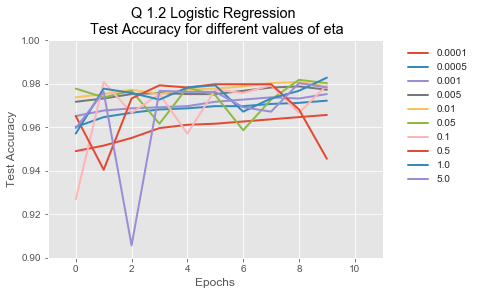

In [4]:

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.set_style("whitegrid")



for idx, y_n in y_list.items():
    line, = ax.plot(x, y_n['test_acc'] , lw=2, label=y_n['eta'])



ax.set_xlim(-1, len(x) + 1)
ax.set_ylim(0.90,1.00)

ax.set_xlabel('Epochs')
ax.set_ylabel('Test Accuracy')

#Now this is actually the code that you need, an easy fix your colors just cut and paste not you need ax.
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])



plt.title('Q 1.2 Logistic Regression \n Test Accuracy for different values of eta')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
plt.clf()
plt.close(fig)

As you can see in the plot. In general accuracy increases with epoch. The exception is if eta is too large.
If eta is too small it takes longer to reach a maximum value.

For example eta = .0001 is monotonically increasing byt starts at much lower test accuracy
for eta > 0.5 the accuracy varies greatly as the number of epcohs (passes) increases


## 2.0 Feature Engineering 

### 2.1 Add features - see source files

### 2.2 Analysis

1. What custom features did you add/try (other than n-grams)? How did those additional fea- tures affect the model performance? Why do you think those additional features helped/hurt the model performance?

0) Given review Length -- Test Accuract 0.49   
I added:  
1) words associated with positive review -- 0.573 test Accuracy  
2) word associated with negative reviews -- 0.547 test accuracy  
3) 2-gram and 3-gram Bag of word Counts -- 0.67  test Accuracy  
4) single word Tfidf (unigram)  -- 0.865 Test accuracy  

(This is accuracy is when used separatly)

Combined accuracy when using all -- 0.667 test accuracy

There was only one thing to do featureization on and that was the text. Therefore all the analyzers user the texts.

The basic feature of counting length appeared to be no better than guessing.
All of the features I added improved performane, the best individual was the unigram tfidf

Since the length of review had only 50% accuracy anything that had predicted value improved performance

I used a count of words associated with positive and negative reviews

The effect of using multiple analyzers left the accuracy in between the highest and lowest analyzer.

I did not normalize the features. Therefore the word count probably had the largest influence over the number of passes. The code could be improved by noramalizing all the features so they can be weighed equally.


###  2.2. What are unigrams, bigrams, and n-grams? When you added those features to the Feature- Union, what happened to the model performance? Why do these features help/hurt?
unigrams -- one word sorting
bigrams -- metrics on 2-word sequential combinations
trigrams -- metrics on 3-word sequential combinations

Counts of bigrams and trigrams was better than my count of positive and negative review words. 
The counts of bigrams and trigrams was not as good as the unigram tfidf

These feature help because some words can be used for both poistive and negative comments. But adding 2-word and 3-word combinations there is more context to the use of the words


### 3. EXTRA CREDIT (extra 10 pts): 
Replace the code that fits the SGDClassifier on the training data with scikit-learn’s k-fold cross validation and use it to determine the best regularization constant alpha for the classifier. Why do we need cross validation to tune the alpha parameter? What did you determine was the best value for alpha? What experiments did you run and what were your cross validation results?

I ran cross validation at these alpha levels:  
0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5 

I started with a lower value of .001 but got better values until I lowered to .00001.
The best corss validation average accuracy was alpha = 0.00005

We need cross validation because there is some variance to the accuracy caluclation depending on the selection of the train/test split. With Cross validation you split the data in a variety of ways to see how the model works with a variety of samples from the same data. You typically would use cross validation when your sample data size was not large.


I ran five fold cross valdiation
* Alpha=  1e-05
* Accuracy on training set = 1.0
* Accuracy on test set = 0.655
* Avg Score= 0.65997791517 [ 0.68683274  0.68214286  0.63571429  0.63928571  0.65591398]
* Alpha=  5e-05
* Accuracy on training set = 1.0
* Accuracy on test set = 0.663333333333  << Best Result
* Avg Score= 0.666373368465 [ 0.71886121  0.65        0.64642857  0.675       0.64157706]
* Alpha=  0.0001
* Accuracy on training set = 1.0
* Accuracy on test set = 0.66
* Avg Score= 0.657102905832 [ 0.6975089   0.64642857  0.63214286  0.66785714  0.64157706]
* Alpha=  0.0005
* Accuracy on training set = 1.0
* Accuracy on test set = 0.663333333333
* Avg Score= 0.669276484941 [ 0.6975089   0.66785714  0.62857143  0.66785714  0.68458781]
* Alpha=  0.001
* Accuracy on training set = 0.996428571429
* Accuracy on test set = 0.606666666667
* Avg Score= 0.596286213563 [ 0.6975089   0.63214286  0.65357143  0.5         0.49820789]
* Alpha=  0.005
* Accuracy on training set = 1.0
* Accuracy on test set = 0.683333333333
* Avg Score= 0.662107916828 [ 0.67615658  0.7         0.63571429  0.67142857  0.62724014]
* Alpha=  0.01
* Accuracy on training set = 0.499285714286
* Accuracy on test set = 0.501666666667
* Avg Score= 0.598561251692 [ 0.51245552  0.65714286  0.63571429  0.68928571  0.49820789]
* Alpha=  0.05
* Accuracy on training set = 0.500714285714
* Accuracy on test set = 0.498333333333
* Avg Score= 0.499997448947 [ 0.50177936  0.5         0.5         0.5         0.49820789]
* Alpha=  0.1
* Accuracy on training set = 0.499285714286
* Accuracy on test set = 0.501666666667
* Avg Score= 0.499999990889 [ 0.49822064  0.5         0.50357143  0.5         0.49820789]
* Alpha=  0.5
* Accuracy on training set = 0.500714285714
* Accuracy on test set = 0.498333333333
* Avg Score= 0.499285705175 [ 0.49822064  0.5         0.5         0.5         0.49820789]

I also ran 10 fold cross validation here are a few samples:
In the case the best alpha was 0.001
And there is a big vriance within the test accuracies across the folds

* ccuracy on training set = 1.0
* Accuracy on test set = 0.66
* Alpha=  1e-05
* Accuracy on training set = 1.0
* Accuracy on test set = 0.655
* Avg Score= 0.672905177378 [ 0.67375887  0.7         0.67857143  0.72142857  0.61428571  0.62857143
*   0.69285714  0.64285714  0.63571429  0.74100719]
* Alpha=  5e-05
* Accuracy on training set = 1.0
* Accuracy on test set = 0.656666666667
* Avg Score= 0.645597734578 [ 0.65957447  0.7         0.63571429  0.69285714  0.62857143  0.62857143
*   0.68571429  0.65714286  0.67142857  0.49640288]
* Alpha=  0.0001
* Accuracy on training set = 1.0
* Accuracy on test set = 0.66
* Avg Score= 0.671481453135 [ 0.64539007  0.7         0.65714286  0.7         0.62857143  0.64285714
*   0.67142857  0.67142857  0.67857143  0.71942446]
* Alpha=  0.0005
* Accuracy on training set = 1.0
* Accuracy on test set = 0.69
* Avg Score= 0.677180468391 [ 0.65957447  0.7         0.67142857  0.71428571  0.62857143  0.67142857
*   0.68571429  0.66428571  0.66428571  0.71223022]
* Alpha=  0.001
* Accuracy on training set = 1.0
* Accuracy on test set = 0.69
* Avg Score= 0.600767167421 [ 0.64539007  0.5         0.5         0.65714286  0.5         0.65
*   0.69285714  0.64285714  0.5         0.71942446]



## 3. Gradient Descent Learning Rule for Multi-class Logistic Regression (20 pts)

Derive the negative log likelihood for multi-class logistic regression.

Given: 
$$
 p( y = c | \textbf{x} ) =  \frac{exp( \beta^{T}_{c} \textbf{x} )}{\Sigma^{C}_{c'=1} exp( \beta^{T}_{c} \textbf{x}) } 
 $$

By definition of likelihood $$ \ell(w) = \Pi^{N}_{i=1} y_{i} p( y_{i}|x_{i},w)    $$

Take log of both sides (and neg since we look for neg log likelihood: 
            $$ -  ln (\ell(\beta))  =  - ln\Pi^{N}_{i=1} p( y_{i}|x_{i},w)   $$
Log of product is sum of logs:
            $$ - ln (\ell(\beta))  = -   \sum^N_{i=1}  ln (p( y_{i}|x_{i},w) )  $$

Plugging in probility           
    $$ - ln (\ell(\beta))  = -   \sum^N_{i=1}  ln (
    \frac{exp( \beta^{T}_{c} x_{i} )}{\Sigma^{C}_{c'=1} exp( \beta^{T}_{c} x_{i}
    ) }  )  $$

Re-arranging to get the negative log likelihood         
    $$ - ln (\ell(\beta))  = -   \sum^N_{i=1} [\beta^{T}_{c}x_{i}  -  ln (\Sigma^{C}_{c'=1} exp( \beta^{T}_{c}x_{i})   )]  $$

The gradient descent learning rule for optimizing weight vectors generalizes to the following form:  $ \beta^{t+1}_{j}  =  \beta^{t}_{j} - \eta \triangledown \beta^{t}_{j} $ where $ \eta $ is the learning rate. Find the $ \eta \triangledown \beta^{t}_{j} $ (the parameter for the feature $ x_{j} $ in class c) for a multi-class logistic regression model.

Gradient per paramater is: $$ \frac{\delta ( \ell( \beta)}{ \delta \beta_{cj}}  =   \frac{\delta }{ \delta \beta_{cj}}  \sum^N_{i=1}[ \beta^{T}_{c}x_{i} -  ln (\Sigma^{C}_{c'=1} exp( \beta^{T}_{c}x_{i})   )]  $$



$$
\frac{\delta }{ \delta \beta_{cj}} ln (\Sigma^{C}_{c'=1} exp( \beta^{T}_{c}x_{i}) = \frac{\delta(y=c) exp( \beta^{T}_{c} x_{
i}) x^{j}_{i}}{\Sigma^{C}_{c'=1} exp( \beta^{T}_{c}x_{i}) }
= \delta(y=c)   p(y=c|x_{i} x_{i}^{j}
$$

Looking at the first part
$$
\frac{\delta }{ \delta \beta_{cj}} \beta^{T}_{c} x_{i} = \delta(y=c) x^{j}_{i}
$$

Looking at the second part:
    
$$
\frac{\delta }{ \delta \beta_{cj}} ln (\Sigma^{C}_{c'=1} exp( \beta^{T}_{c}x_{i}) = \frac{ \Sigma^{C}_{c'=1} \delta(y=c) exp( \beta^{T}_{c} x_{
i}) x^{j}_{i}}{\Sigma^{C}_{c'=1} exp( \beta^{T}_{c}x_{i}) }
=  \Sigma^{C}_{c'=1}\delta(y=c)   p(y=c|x_{i} )x_{i}^{j} = p(y=c|x_{i} )x_{i}^{j}
$$




Where $$ \delta(y_{i}=c|x_{i}) = 1 $$ if $$ y_{i} = c $$ and $$ \delta(y_{i}=c|x_{i}) = 0 $$ if $$ y_{i} \ne c $$

Putting it together

$$ \frac{\delta ( \ell( \beta)}{ \delta \beta_{cj}}  =   \sum^N_{i=1}[  x_{i}^{j} (\delta(y=c)  -  p(y=c|x_{i})]  $$
